# Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
results = '/content/drive/My Drive/UFMG - projetos/Juliana Nicolino/Resultados/'
folder = '/content/drive/My Drive/UFMG - projetos/Juliana Nicolino/Coleta Teste Dani Vaz/Coletas/'
mark_folder = '/content/drive/My Drive/UFMG - projetos/Juliana Nicolino/Coleta Teste Dani Vaz/Coletas/manual_marks/'
plots_folder = '/content/drive/My Drive/UFMG - projetos/Juliana Nicolino/Coleta Teste Dani Vaz/Coletas/plots/'
plots_filtered = '/content/drive/My Drive/UFMG - projetos/Juliana Nicolino/Coleta Teste Dani Vaz/Coletas/plots_filtered/'
plots_angles = '/content/drive/My Drive/UFMG - projetos/Juliana Nicolino/Coleta Teste Dani Vaz/Coletas/anticipation angles/'

Mounted at /content/drive/


In [ ]:
!pip install vg

In [ ]:
import glob
import pandas as pd
import numpy as np
import scipy.signal as sg
import scipy as sc
import matplotlib.pyplot as plt
import os
import vg

# Read all files

In [ ]:
conds = ['Com dor','Sem dor']
folders = glob.glob(folder+conds[0]+'/*')
folders += glob.glob(folder+conds[1]+'/*')
all_files = []
for p in folders:
  files = glob.glob(p+'/T*.xlsx')
  if len(files) == 0:
    files = glob.glob(p+'/rep*.xlsx')
  if len(files) == 0:
    files = glob.glob(p+'/REP*.xlsx')
  if len(files) == 0:
    files = glob.glob(p+'/R*.xlsx')

  if len(files) != 4:
    print('Erro! Número de tentativas errado: ',len(files),' - ',p)
  all_files += files


In [ ]:
len(all_files)

220

# Pre-processing

## Read signals

In [ ]:
fid = 20
d = pd.read_excel(all_files[fid])
t = d['X [s]'].to_numpy()
pelve_acc = d[['Pelve: ACC.X 1 [g]', 'Pelve: ACC.Y 1 [g]','Pelve: ACC.Z 1 [g]']].to_numpy()
pelve_gyro = d[['Pelve: GYRO.X 1 [°/s]', 'Pelve: GYRO.Y 1 [°/s]', 'Pelve: GYRO.Z 1 [°/s]']].to_numpy()
ombroE_acc = d[['Ombro E: ACC.X 2 [g]', 'Ombro E: ACC.Y 2 [g]', 'Ombro E: ACC.Z 2 [g]']].to_numpy()
ombroE_gyro = d[['Ombro E: GYRO.X 2 [°/s]', 'Ombro E: GYRO.Y 2 [°/s]', 'Ombro E: GYRO.Z 2 [°/s]']].to_numpy()
ombroD_acc = d[['Ombro D: ACC.X 3 [g]', 'Ombro D: ACC.Y 3 [g]', 'Ombro D: ACC.Z 3 [g]']].to_numpy()
ombroD_gyro = d[['Ombro D: GYRO.X 3 [°/s]', 'Ombro D: GYRO.Y 3 [°/s]', 'Ombro D: GYRO.Z 3 [°/s]']].to_numpy()
C7_acc = d[['C7: ACC.X 4 [g]', 'C7: ACC.Y 4 [g]', 'C7: ACC.Z 4 [g]']].to_numpy()
C7_gyro = d[['C7: GYRO.X 4 [°/s]', 'C7: GYRO.Y 4 [°/s]', 'C7: GYRO.Z 4 [°/s]']].to_numpy()
torax_acc = d[['Torácica: ACC.X 5 [g]', 'Torácica: ACC.Y 5 [g]','Torácica: ACC.Z 5 [g]']].to_numpy()
torax_gyro = d[['Torácica: GYRO.X 5 [°/s]','Torácica: GYRO.Y 5 [°/s]', 'Torácica: GYRO.Z 5 [°/s]']].to_numpy()
coxaD_acc = d[['Coxa D: ACC.X 6 [g]', 'Coxa D: ACC.Y 6 [g]', 'Coxa D: ACC.Z 6 [g]']].to_numpy()
coxaD_gyro = d[['Coxa D: GYRO.X 6 [°/s]', 'Coxa D: GYRO.Y 6 [°/s]', 'Coxa D: GYRO.Z 6 [°/s]']].to_numpy()
coxaE_acc = d[['Coxa E: ACC.X 8 [g]', 'Coxa E: ACC.Y 8 [g]', 'Coxa E: ACC.Z 8 [g]']].to_numpy()
coxaE_gyro = d[['Coxa E: GYRO.X 8 [°/s]', 'Coxa E: GYRO.Y 8 [°/s]','Coxa E: GYRO.Z 8 [°/s]']].to_numpy()
evento = d[['Evento: ACC.X 7 [g]', 'Evento: ACC.Y 7 [g]', 'Evento: ACC.Z 7 [g]', 'Evento: GYRO.X 7 [°/s]', 'Evento: GYRO.Y 7 [°/s]', 'Evento: GYRO.Z 7 [°/s]']].to_numpy()

## Start and end of signal

In [ ]:
# delete zeros at beginning and ending: acquisition system is off
M = d.iloc[:,1:].to_numpy()
p = 0
while np.linalg.norm(M[p,:])==0.0:
  p +=1
p += 30
k = M.shape[0]-1
while np.linalg.norm(M[k,:])==0.0:
  k -=1
M = M[p:k,:]
t = t[p:k]

pelve_acc = pelve_acc[p:k,:]
pelve_gyro = pelve_gyro[p:k,:]
ombroE_acc = ombroE_acc[p:k,:]
ombroE_gyro = ombroE_gyro[p:k,:]
ombroD_acc = ombroD_acc[p:k,:]
ombroD_gyro = ombroD_gyro[p:k,:]
C7_acc = C7_acc[p:k,:]
C7_gyro = C7_gyro[p:k,:]
torax_acc = torax_acc[p:k,:]
torax_gyro = torax_gyro[p:k,:]
coxaD_acc = coxaD_acc[p:k,:]
coxaD_gyro = coxaD_gyro[p:k,:]
coxaE_acc = coxaE_acc[p:k,:]
coxaE_gyro = coxaE_gyro[p:k,:]
evento = evento[p:k,:]

In [ ]:
len(evento)


5034

## Detect start and end of movement using average acceleration and gyroscope

In [ ]:
avg_acc = (pelve_acc + ombroE_acc + ombroD_acc + C7_acc + torax_acc + coxaD_acc + coxaE_acc)*(1/7.0)
avg_gyro = (pelve_gyro + ombroE_gyro + ombroD_gyro + C7_gyro + torax_gyro + coxaD_gyro + coxaE_gyro)*(1/7.0)

In [ ]:
def take_start_value(M):
  s = 50
  start_acc = np.mean(M[:s,:],axis=0)
  M -= start_acc

In [ ]:
avg_acc.shape

(5034, 3)

In [ ]:
take_start_value(avg_acc)
take_start_value(avg_gyro)

take_start_value(pelve_acc)
take_start_value(pelve_gyro)
take_start_value(ombroE_acc)
take_start_value(ombroE_gyro)
take_start_value(ombroD_acc)
take_start_value(ombroD_gyro)
take_start_value(C7_acc)
take_start_value(C7_gyro)
take_start_value(torax_acc)
take_start_value(torax_gyro)
take_start_value(coxaD_acc)
take_start_value(coxaD_gyro)
take_start_value(coxaE_acc)
take_start_value(coxaE_gyro)
take_start_value(evento)

In [ ]:
def integrate(signal_o,t):
  signal = sc.integrate.cumulative_simpson(signal_o,x=t,axis=0)
  signal = np.concatenate((np.array([[0.0,0.0,0.0]]), signal),axis = 0)

  N = signal_o.shape[0]
  n = int(np.round(0.01*N))
  n = 3
  avg_s = np.mean(signal[:n,:],axis=0)
  avg_e = np.mean(signal[-n:,:],axis=0)

  p = np.linspace(0,N-1,N)
  ptrend = np.polyfit(p,signal,2)
  trend = np.polyval(ptrend,p.reshape((N,1)))
  signal -= trend

  return signal

In [ ]:
avg_vel = integrate(avg_acc,t)
# avg_pos = integrate(avg_vel,t)
avg_angle = integrate(avg_gyro,t)

pelve_acc =
pelve_gyro)
take_start_value(ombroE_acc)
take_start_value(ombroE_gyro)
take_start_value(ombroD_acc)
take_start_value(ombroD_gyro)
take_start_value(C7_acc)
take_start_value(C7_gyro)
take_start_value(torax_acc)
take_start_value(torax_gyro)
take_start_value(coxaD_acc)
take_start_value(coxaD_gyro)
take_start_value(coxaE_acc)
take_start_value(coxaE_gyro)
take_start_value(evento)

In [ ]:
avg_vel = sc.integrate.cumulative_simpson(avg_acc,x=t,axis=0)
avg_vel = np.concatenate((np.array([[0.0,0.0,0.0]]), avg_vel),axis = 0)
avg_pos = sc.integrate.cumulative_simpson(avg_vel,x=t,axis=0)
avg_pos = np.concatenate((np.array([[0.0,0.0,0.0]]), avg_pos),axis = 0)
#avg_pos = avg_pos-avg_pos[:,1].reshape((-1,1))@np.ones((1,3))


In [ ]:
avg_angle = sc.integrate.cumulative_simpson(avg_gyro,x=t,axis=0)
avg_angle = np.concatenate((np.array([[0.0,0.0,0.0]]), avg_angle),axis = 0)

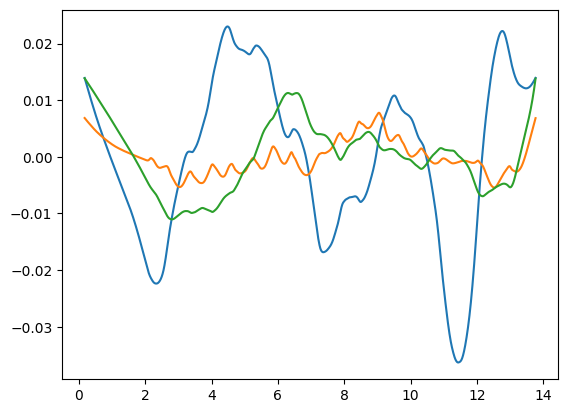

In [ ]:
plt.plot(t,avg_pos)

In [ ]:
tests_ = ['ASSO1308', 'ACRER1707']

In [ ]:
def plot_block_independent(part,trial,door):
  t = np.linspace(0,1,200)

  for i in range(1):
    r = 0.16*np.random.rand(t.shape[0])
    r0 = 0.12*np.random.rand(t.shape[0])
    rf = 0.1*np.random.rand(t.shape[0])
    ar = 0.6*np.random.rand()
    y1 = np.sin((4.04+rf)*t+0.2+1.5*rf)+r+0.1*np.sin((14.04+rf)*t+0.22+0.45*rf)
    y2 = np.sin((3.6+rf)*t+1.6+4*r0)+r0+0.08*np.sin((24.04+rf)*t+0.18+0.55*rf+ar)
    plt.figure()
    plt.plot(t,y1,t,y2)
    plt.legend(['Trunk','Pelve'])
    plt.savefig(plots_angles+'Angles anticipation_part_'+part+'_trial_'+str(trial)+'_door_'+str(door)+'.png')

In [ ]:
for ff in folders:
  for tt in tests_:
    if tt in ff:
      for t in range(4):
        for d in range(3):
          plot_block_independent(tt,t,d)

In [ ]:
files = glob.glob(folders[15]+'/*')

In [ ]:
files[:5]

['/content/drive/My Drive/UFMG - projetos/Juliana Nicolino/Coleta Teste Dani Vaz/Coletas/Com dor/KVRR2804/Estático.xlsx',
 '/content/drive/My Drive/UFMG - projetos/Juliana Nicolino/Coleta Teste Dani Vaz/Coletas/Com dor/KVRR2804/FB.xlsx',
 '/content/drive/My Drive/UFMG - projetos/Juliana Nicolino/Coleta Teste Dani Vaz/Coletas/Com dor/KVRR2804/FI.xlsx',
 '/content/drive/My Drive/UFMG - projetos/Juliana Nicolino/Coleta Teste Dani Vaz/Coletas/Com dor/KVRR2804/RB.xlsx',
 '/content/drive/My Drive/UFMG - projetos/Juliana Nicolino/Coleta Teste Dani Vaz/Coletas/Com dor/KVRR2804/RI.xlsx']

In [ ]:
t = np.linspace(0,1,200)

for i in range(24):
  r = 0.12*np.random.rand(t.shape[0])
  r0 = 0.12*np.random.rand(t.shape[0])
  rf = 0.1*np.random.rand(t.shape[0])
  y1 = np.sin((4.04+rf)*t+0.2+1.5*rf)+r+0.1*np.sin((14.04+rf)*t+0.2+0.5*rf)
  y2 = np.sin((3.6+rf)*t+0.6+4*r0)+r0+0.08*np.sin((24.04+rf)*t+0.2+0.5*rf)
  plt.figure()
  plt.plot(t,y1,t,y2,t,y2-y1)
  plt.legend(['Block vertical','Independent vertical','Difference'])
  plt.savefig(plots_folder+'Angles anticipation_'+str()+'.png')

In [ ]:
def angle_3d(v,u):
  a = vg.angle(v,u)
  return a

In [ ]:
def angle_times(M):
  ang = np.zeros((M.shape[0],1))
  for i in range(M.shape[0]):
    u = M[i,:]
    v = np.array([0,-9.81,0])
    ang[i,0] = angle_3d(v,u)

  return ang

In [ ]:
def block_angle(d):

  pelve_acc = d.loc[:,['Pelve: ACC.X 1 [g]',
               'Pelve: ACC.Y 1 [g]',
               'Pelve: ACC.Z 1 [g]']].to_numpy()
  toracica_acc = d.loc[:,['Torácica: ACC.X 5 [g]', 'Torácica: ACC.Y 5 [g]',
               'Torácica: ACC.Z 5 [g]']].to_numpy()
  ombroe_acc = d.loc[:,['Ombro E: ACC.X 2 [g]', 'Ombro E: ACC.Y 2 [g]',
       'Ombro E: ACC.Z 2 [g]']].to_numpy()
  ombrod_acc = d.loc[:,['Ombro D: ACC.X 3 [g]', 'Ombro D: ACC.Y 3 [g]',
                        'Ombro D: ACC.Z 3 [g]']].to_numpy()
  coxae_acc = d.loc[:,['Coxa E: ACC.X 8 [g]', 'Coxa E: ACC.Y 8 [g]',
                        'Coxa E: ACC.Z 8 [g]']].to_numpy()
  coxad_acc = d.loc[:,['Coxa D: ACC.X 6 [g]', 'Coxa D: ACC.Y 6 [g]',
                        'Coxa D: ACC.Z 6 [g]']].to_numpy()

  avg_vec = (pelve_acc+toracica_acc+ombroe_acc+ombrod_acc)*0.25

  return angle_times(avg_vec)


In [ ]:
def independent_angle(d):

  pelve_acc = d.loc[:,['Pelve: ACC.X 1 [g]',
               'Pelve: ACC.Y 1 [g]',
               'Pelve: ACC.Z 1 [g]']].to_numpy()
  toracica_acc = d.loc[:,['Torácica: ACC.X 5 [g]', 'Torácica: ACC.Y 5 [g]',
               'Torácica: ACC.Z 5 [g]']].to_numpy()
  ombroe_acc = d.loc[:,['Ombro E: ACC.X 2 [g]', 'Ombro E: ACC.Y 2 [g]',
       'Ombro E: ACC.Z 2 [g]']].to_numpy()
  ombrod_acc = d.loc[:,['Ombro D: ACC.X 3 [g]', 'Ombro D: ACC.Y 3 [g]',
                        'Ombro D: ACC.Z 3 [g]']].to_numpy()
  coxae_acc = d.loc[:,['Coxa E: ACC.X 8 [g]', 'Coxa E: ACC.Y 8 [g]',
                        'Coxa E: ACC.Z 8 [g]']].to_numpy()
  coxad_acc = d.loc[:,['Coxa D: ACC.X 6 [g]', 'Coxa D: ACC.Y 6 [g]',
                        'Coxa D: ACC.Z 6 [g]']].to_numpy()

  avg_vec = (toracica_acc-(coxae_acc+coxad_acc)*0.5)*0.5

  return angle_times(avg_vec)


In [ ]:
def average_trials(t,x,peaks):
  res = 0
  for pi, pf in zip(peaks[0::2],peaks[1::2]):
    res += np.max(x[pi:pf])-np.min(x[pi:pf])

  res /= 3
  return res

In [ ]:
def split_trials(t,x,peaks):
  tv = []
  xv = []

  for i in range(0,6,2):
    tv.append(t[peaks[i]:peaks[i+1]])
    xv.append(x[peaks[i]:peaks[i+1]])

  return tv, xv


In [ ]:
def find_passages(d):
  t = d['X [s]'].to_numpy()
  M = d.loc[:,['Evento: ACC.X 7 [g]',
                   'Evento: ACC.Y 7 [g]',
                   'Evento: ACC.Z 7 [g]',
                   'Evento: GYRO.X 7 [°/s]',
                   'Evento: GYRO.Y 7 [°/s]',
                   'Evento: GYRO.Z 7 [°/s]']].to_numpy()
  event = np.linalg.norm(M,axis=1)
  peaks,_ = sg.find_peaks(event,distance=40,prominence=150,threshold=2,
                          plateau_size = [1,20],width=[1,15])

  fpeaks = []
  for p in peaks:
    if t[p]> 0.1*t[-1] and t[p] < 0.97*t[-1]:
      fpeaks.append(p)

  if len(fpeaks)>0:
    ffpeaks = [fpeaks[0]]
    for i in range(1,len(fpeaks)):
      if fpeaks[i]-ffpeaks[-1]>190 and event[fpeaks[i]] > 0.27*np.max(event):
        ffpeaks.append(fpeaks[i])

    if len(ffpeaks) == 5:
      ffpeaks.append(len(t)-10)

    if len(ffpeaks)!= 6:
      plt.plot(t,event,t[fpeaks],event[fpeaks],'r+')
      plt.show()

    return ffpeaks
  else:
    return []

In [ ]:
#errors
errors = []

# table to store results
T = pd.DataFrame(columns = ['participant', 'condition',
                            'time_pass_1',
                            'time_pass_2',
                            'time_pass_3',
                            'independent_pass_1',
                            'independent_pass_2',
                            'independent_pass_3',
                            'block_pass_1',
                            'block_pass_2',
                            'block_pass_3'])

for c in conds:
  folders = glob.glob(folder+c+'/*')
  participants = [f.split('/')[-1] for f in folders]

  for p in participants:
    files = glob.glob(folder+c+'/'+p+'/T*.xlsx')
    if len(files) != 4:
      files = glob.glob(folder+c+'/'+p+'/rep*.xlsx')
    if len(files) != 4:
      files = glob.glob(folder+c+'/'+p+'/REP*.xlsx')
    if len(files) != 4:
      files = glob.glob(folder+c+'/'+p+'/R*.xlsx')

    if len(files) != 4:
      print('Erro! Número de tentativas errado: ',len(files),' - ',c,p)

    times_passages = [0,0,0]
    independent_angle_passages = [0,0,0]
    block_angle_passages = [0,0,0]

    ctrial = 0.0
    for trial, fi in enumerate(files):
      d = pd.read_excel(fi)

      t = d['X [s]'].to_numpy()
      ia = independent_angle(d)
      ba = block_angle(d)
      peaks = find_passages(d)

      if len(peaks) == 6:
        ctrial += 1.0
        ts, bas = split_trials(t,ba,peaks)
        _, ias = split_trials(t,ia,peaks)

        for i in range(3):
          times_passages[i] += (ts[i][-1]-ts[i][0])
          independent_angle_passages[i] += (np.max(ias[i])-np.min(ias[i]))
          block_angle_passages[i] += (np.max(bas[i])-np.min(bas[i]))

      else:
        print('Erro! Sem detecção de passagens.',c,p,trial)
        errors.append(files)

    if ctrial>0:
      print('Tentativas:',ctrial)
      for i in range(3):
        times_passages[i] /=ctrial
        independent_angle_passages[i] /= ctrial
        block_angle_passages[i] /= ctrial

      row = {'participant': [p], 'condition': [c],
            'time_pass_1': times_passages[0],
            'time_pass_2': times_passages[1],
            'time_pass_3': times_passages[2],
            'independent_pass_1': independent_angle_passages[0],
            'independent_pass_2': independent_angle_passages[1],
            'independent_pass_3': independent_angle_passages[2],
            'block_pass_1': block_angle_passages[0],
            'block_pass_2': block_angle_passages[1],
            'block_pass_3': block_angle_passages[2]}
      Ti = pd.DataFrame(data=row)
      T = pd.concat((T,Ti),ignore_index=True)
    else:
      print('Erro! Nenhuma tentativa encontrada.')



In [ ]:
#errors
errors = []

# table to store results
T = pd.DataFrame(columns = ['participant', 'condition',
                            'time_pass_1',
                            'time_pass_2',
                            'time_pass_3',
                            'independent_pass_1',
                            'independent_pass_2',
                            'independent_pass_3',
                            'block_pass_1',
                            'block_pass_2',
                            'block_pass_3'])

for c in conds:
  folders = glob.glob(folder+c+'/*')
  participants = [f.split('/')[-1] for f in folders]

  for p in participants:
    files = glob.glob(folder+c+'/'+p+'/T*.xlsx')
    if len(files) != 4:
      files = glob.glob(folder+c+'/'+p+'/rep*.xlsx')
    if len(files) != 4:
      files = glob.glob(folder+c+'/'+p+'/REP*.xlsx')
    if len(files) != 4:
      files = glob.glob(folder+c+'/'+p+'/R*.xlsx')

    if len(files) != 4:
      print('Erro! Número de tentativas errado: ',len(files),' - ',c,p)

    times_passages = [0,0,0]
    independent_angle_passages = [0,0,0]
    block_angle_passages = [0,0,0]

    ctrial = 0.0
    for trial, fi in enumerate(files):
      d = pd.read_excel(fi)

      t = d['X [s]'].to_numpy()
      ia = independent_angle(d)
      ba = block_angle(d)

      plt.figure()
      plt.plot(t,ia)
      plt.title('Independent angle')
      plt.savefig(plots_folder+p+'_'+c+'_'+str(trial)+'_independent.png')
      plt.clf()

      plt.figure()
      plt.plot(t,ia)
      plt.title('Block angle')
      plt.savefig(plots_folder+p+'_'+str(trial)+'_block.png')
      plt.clf()

In [ ]:
T.shape

(54, 11)

In [ ]:
# table to store results
T = pd.DataFrame(columns = ['participant', 'condition', 'trial','independent',
                                  'block'])
for c in conds:
  folders = glob.glob(folder+c+'/*')
  participants = [f.split('/')[-1] for f in folders]

  for p in participants:
    files = glob.glob(folder+c+'/'+p+'/T*.xlsx')
    if len(files) == 0:
      files = glob.glob(folder+c+'/'+p+'/rep*.xlsx')
    if len(files) == 0:
      files = glob.glob(folder+c+'/'+p+'/REP*.xlsx')
    if len(files) == 0:
      files = glob.glob(folder+c+'/'+p+'/R*.xlsx')

    if len(files) != 4:
      print('Erro! Número de tentativas errado: ',len(files),' - ',c,p)

    times_passages = [0,0,0]
    independent_angle_passages = [0,0,0]
    block_angle_passages = [0,0,0]

    ctrial = 0.0
    for trial, fi in enumerate(files):
      d = pd.read_excel(fi)

      t = d['X [s]'].to_numpy()
      ia = independent_angle(d)
      ba = block_angle(d)
      peaks = find_passages(d)

      print(len(peaks))

In [ ]:
T.to_excel(folder+'passagem_angulos.xlsx',index=False)
T.to_csv(folder+'passagem_angulos.csv',index=False)

In [ ]:
#errors
errors = []

# table to store results
T = pd.DataFrame(columns = ['participant', 'condition',
                            'time_pass_1',
                            'time_pass_2',
                            'time_pass_3',
                            'independent_pass_1',
                            'independent_pass_2',
                            'independent_pass_3',
                            'block_pass_1',
                            'block_pass_2',
                            'block_pass_3'])

for c in conds[:1]:
  folders = glob.glob(folder+c+'/*')
  participants = [f.split('/')[-1] for f in folders]

  for p in participants[:1]:
    files = glob.glob(folder+c+'/'+p+'/T*.xlsx')
    if len(files) != 4:
      files = glob.glob(folder+c+'/'+p+'/rep*.xlsx')
    if len(files) != 4:
      files = glob.glob(folder+c+'/'+p+'/REP*.xlsx')
    if len(files) != 4:
      files = glob.glob(folder+c+'/'+p+'/R*.xlsx')

    if len(files) != 4:
      print('Erro! Número de tentativas errado: ',len(files),' - ',c,p)

    times_passages = [0,0,0]
    independent_angle_passages = [0,0,0]
    block_angle_passages = [0,0,0]

    ctrial = 0.0
    for trial, fi in enumerate(files):
      d = pd.read_excel(fi)

      t = d['X [s]'].to_numpy()

In [ ]:
t

array([0.0000e+00, 2.7000e-03, 5.4000e-03, ..., 9.9819e+00, 9.9846e+00,
       9.9873e+00])

In [ ]:
d.columns

Index(['X [s]', 'Pelve: ACC.X 1 [g]', 'Pelve: ACC.Y 1 [g]',
       'Pelve: ACC.Z 1 [g]', 'Pelve: GYRO.X 1 [°/s]', 'Pelve: GYRO.Y 1 [°/s]',
       'Pelve: GYRO.Z 1 [°/s]', 'Ombro E: ACC.X 2 [g]', 'Ombro E: ACC.Y 2 [g]',
       'Ombro E: ACC.Z 2 [g]', 'Ombro E: GYRO.X 2 [°/s]',
       'Ombro E: GYRO.Y 2 [°/s]', 'Ombro E: GYRO.Z 2 [°/s]',
       'Ombro D: ACC.X 3 [g]', 'Ombro D: ACC.Y 3 [g]', 'Ombro D: ACC.Z 3 [g]',
       'Ombro D: GYRO.X 3 [°/s]', 'Ombro D: GYRO.Y 3 [°/s]',
       'Ombro D: GYRO.Z 3 [°/s]', 'C7: ACC.X 4 [g]', 'C7: ACC.Y 4 [g]',
       'C7: ACC.Z 4 [g]', 'C7: GYRO.X 4 [°/s]', 'C7: GYRO.Y 4 [°/s]',
       'C7: GYRO.Z 4 [°/s]', 'Torácica: ACC.X 5 [g]', 'Torácica: ACC.Y 5 [g]',
       'Torácica: ACC.Z 5 [g]', 'Torácica: GYRO.X 5 [°/s]',
       'Torácica: GYRO.Y 5 [°/s]', 'Torácica: GYRO.Z 5 [°/s]',
       'Coxa D: ACC.X 6 [g]', 'Coxa D: ACC.Y 6 [g]', 'Coxa D: ACC.Z 6 [g]',
       'Coxa D: GYRO.X 6 [°/s]', 'Coxa D: GYRO.Y 6 [°/s]',
       'Coxa D: GYRO.Z 6 [°/s]', 'Evento: A

# Pre-processing

In [ ]:
avg_pos[:,1]@np.ones((1,3))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 3614)

In [ ]:
avg_pos[:,1].reshape((-1,1))@np.ones((1,3))

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-4.15283203e-09, -4.15283203e-09, -4.15283203e-09],
       [-1.91538783e-08, -1.91538783e-08, -1.91538783e-08],
       ...,
       [ 4.13130802e-01,  4.13130802e-01,  4.13130802e-01],
       [ 4.13360531e-01,  4.13360531e-01,  4.13360531e-01],
       [ 4.13591065e-01,  4.13591065e-01,  4.13591065e-01]])